<div style="overflow: hidden; white-space: nowrap;">
  <div style="display: inline-block; animation: scroll 10s linear infinite;">
    <h2>EXAMINING PREDICTORS OF MYOCARDIAL INFARCTION</h2>
  </div>
</div>

<style>
@keyframes scroll {
  0% { transform: translateX(100%); }
  100% { transform: translateX(-100%); }
}
</style>

<p> This is an analysis of a synthetic myocardial infarction predictors dataset (produced by chatGPT) for those aged 25 and older based on demographic, socioeconomic, geographic, behavioral risk factors, as well as access to healthcare variables. I am going to examine and model behavioural risk factors contirbuting to MIs to help guide people toward effective preventative behaviours.</p>

<h4>Importing Libraries</h4>

In [2]:
#Basic dataframe, array, and math stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set()
import statsmodels.api as sm

<h4>Opening the dataset</h4>

In [2]:
MI_Predictors_df = pd.read_csv('C:\\Users\\User\\My Work\\CODE Lancashire Learning\\Code Lancashire Repository\\Data Analysis Project\\heart_attack_prediction_dataset.csv')

In [3]:
#What data have I got?
MI_Predictors_df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
MI_Predictors_df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [5]:
#The dataframe keys
MI_Predictors_df.keys()

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

<h4>Removing unwanted columns from the dataset</h4>

In [6]:
MI_Predictors2_df = MI_Predictors_df.drop(['Patient ID', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Previous Heart Problems', 'Medication Use', 'Income', 'BMI', 'Triglycerides', 'Country',
       'Continent', 'Hemisphere'], axis=1)
print(MI_Predictors2_df)

      Age  Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  \
0      67        1        0                    0                 4.168189   
1      21        1        1                    1                 1.813242   
2      21        0        0                    0                 2.078353   
3      84        1        0                    1                 9.828130   
4      66        1        1                    0                 5.804299   
...   ...      ...      ...                  ...                      ...   
8758   60        1        0                    1                 7.917342   
8759   28        0        1                    0                16.558426   
8760   47        1        1                    1                 3.148438   
8761   36        1        0                    0                 3.789950   
8762   25        0        0                    1                18.081748   

           Diet  Stress Level  Sedentary Hours Per Day  \
0       Average  

In [7]:
#saving it
MI_Predictors2_df.to_csv('MI_Predictors2_df.csv', sep=',')

<h3>Determine which age groups to use</h3>

In [8]:
#categorising the age groups
#18 to 24 9.3% MI
#25 to 34 14.3% MI
#35 to 44 15% MI
#45 to 54 12% MI
#55 to 64 13% MI
#65 + 36% MI

MI_Predictors2_df['Age']
MI_Predictors2_df['Age Category'] = pd.cut(MI_Predictors2_df['Age'], bins=[18, 24, 34, 44, 54, 64, 90], include_lowest=True)
column_to_move = MI_Predictors2_df.pop("Age Category")

#adding new column to dataframe
MI_Predictors2_df.insert(1, "Age Category", column_to_move)

#Create a cross tabulation of Age Category and MI
pd.crosstab(MI_Predictors2_df['Age Category'],MI_Predictors2_df['Heart Attack Risk'][MI_Predictors2_df['Heart Attack Risk']==1],normalize = 'columns', margins=True)

Heart Attack Risk,1,All
Age Category,,
"(17.999, 24.0]",0.093660,0.093660
"(24.0, 34.0]",0.143039,0.143039
"(34.0, 44.0]",0.150366,0.150366
"(44.0, 54.0]",0.122651,0.122651
"(54.0, 64.0]",0.131571,0.131571
"(64.0, 90.0]",0.358713,0.358713


<h3>Restricting Analysis to Age Categories 25-34+, just to show that I can</h3>

In [9]:
MI_Predictors2_df = MI_Predictors2_df.drop(MI_Predictors2_df[MI_Predictors2_df['Age'] < 25].index)

In [10]:
#saving it
MI_Predictors2_df.to_csv('MI_Predictors2_df.csv', sep=',')

In [3]:
MI_Predictors2_df = pd.read_csv('C:\\Users\\User\\My Work\\CODE Lancashire Learning\\Code Lancashire Repository\\Data Analysis Project\\MI_Predictors2_df.csv')

<h3>Recoding columns</h3>

<h4><strong>Diet</strong></h4>
1=Average, 2=Unhealty, 3=Healthy

In [12]:
#DIET TYPE

Diet_data_type = MI_Predictors2_df['Diet'].dtype
print(Diet_data_type)

Diet_unique_values = MI_Predictors2_df['Diet'].unique()
print(Diet_unique_values)



object
['Average' 'Unhealthy' 'Healthy']


In [13]:
#Healthy = 1
#Average = 2
#Unhealthy = 3


MI_Predictors2_df['Diet Int']=MI_Predictors2_df['Diet'].replace({'Average': 2, 'Unhealthy':3,'Healthy':1})

#Add this column next to Diet
column_to_move = MI_Predictors2_df.pop("Diet Int")

#adding new column to dataframe
MI_Predictors2_df.insert(7, "Diet Int", column_to_move)
print(MI_Predictors2_df)

MI_Predictors2_df.to_csv('MI_Predictors2_df.csv', sep=',')

      Unnamed: 0  Age  Age Category  Smoking  Obesity  Alcohol Consumption  \
0              0   67  (64.0, 90.0]        1        0                    0   
1              3   84  (64.0, 90.0]        1        0                    1   
2              4   66  (64.0, 90.0]        1        1                    0   
3              5   54  (44.0, 54.0]        1        0                    1   
4              6   90  (64.0, 90.0]        1        0                    1   
...          ...  ...           ...      ...      ...                  ...   
7898        8758   60  (54.0, 64.0]        1        0                    1   
7899        8759   28  (24.0, 34.0]        0        1                    0   
7900        8760   47  (44.0, 54.0]        1        1                    1   
7901        8761   36  (34.0, 44.0]        1        0                    0   
7902        8762   25  (24.0, 34.0]        0        0                    1   

      Exercise Hours Per Week  Diet Int       Diet  Stress Leve

<h4 style="color: red;"><strong>Exercise hours per week</strong></h4>
<div style="color: red;">I can't change the 0-5 category to '1'</div><br>
1=0-5, 2=6-10, 3=11-15, 4=16-20

In [14]:
#categorising the exercise groups

MI_Predictors2_df['Exercise Hours Per Week']
MI_Predictors2_df['Exercise Category'] = pd.cut(MI_Predictors2_df['Exercise Hours Per Week'], bins=[0, 5, 10, 15, 20], include_lowest=True)
column_to_move = MI_Predictors2_df.pop("Exercise Category")

#adding new column to dataframe

MI_Predictors2_df.insert(7, "Exercise Category", column_to_move)
print(MI_Predictors2_df)

      Unnamed: 0  Age  Age Category  Smoking  Obesity  Alcohol Consumption  \
0              0   67  (64.0, 90.0]        1        0                    0   
1              3   84  (64.0, 90.0]        1        0                    1   
2              4   66  (64.0, 90.0]        1        1                    0   
3              5   54  (44.0, 54.0]        1        0                    1   
4              6   90  (64.0, 90.0]        1        0                    1   
...          ...  ...           ...      ...      ...                  ...   
7898        8758   60  (54.0, 64.0]        1        0                    1   
7899        8759   28  (24.0, 34.0]        0        1                    0   
7900        8760   47  (44.0, 54.0]        1        1                    1   
7901        8761   36  (34.0, 44.0]        1        0                    0   
7902        8762   25  (24.0, 34.0]        0        0                    1   

      Exercise Hours Per Week Exercise Category  Diet Int      

In [15]:
# Convert the 'Exercise Category' to strings
MI_Predictors2_df['Exercise Category'] = MI_Predictors2_df['Exercise Category'].astype(str)

# Define the mapping dictionary
category_mapping = {
    '[0, 5.0]': '0-5',
    '(5.0, 10.0]': '6-10',
    '(10.0, 15.0]': '11-15',
    '(15.0, 20.0]': '16-20'
}

# Replace the categories with the new values
MI_Predictors2_df['Exercise Category'] = MI_Predictors2_df['Exercise Category'].replace(category_mapping)

# Define a new mapping dictionary to convert strings to numbers
numeric_mapping = {
    '0-5': 1,
    '6-10': 2,
    '11-15': 3,
    '16-20': 4
}

# Use the new mapping to convert strings to numbers
MI_Predictors2_df['Exercise Category'] = MI_Predictors2_df['Exercise Category'].replace(numeric_mapping)

# Print the DataFrame
print(MI_Predictors2_df)

      Unnamed: 0  Age  Age Category  Smoking  Obesity  Alcohol Consumption  \
0              0   67  (64.0, 90.0]        1        0                    0   
1              3   84  (64.0, 90.0]        1        0                    1   
2              4   66  (64.0, 90.0]        1        1                    0   
3              5   54  (44.0, 54.0]        1        0                    1   
4              6   90  (64.0, 90.0]        1        0                    1   
...          ...  ...           ...      ...      ...                  ...   
7898        8758   60  (54.0, 64.0]        1        0                    1   
7899        8759   28  (24.0, 34.0]        0        1                    0   
7900        8760   47  (44.0, 54.0]        1        1                    1   
7901        8761   36  (34.0, 44.0]        1        0                    0   
7902        8762   25  (24.0, 34.0]        0        0                    1   

      Exercise Hours Per Week Exercise Category  Diet Int      

In [16]:

#Are there any missing variables?
missing_values_count = MI_Predictors2_df.isna().sum()
print(missing_values_count)

Unnamed: 0                         0
Age                                0
Age Category                       0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Exercise Category                  0
Diet Int                           0
Diet                               0
Stress Level                       0
Sedentary Hours Per Day            0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
dtype: int64


<h3>Now I'm feeling out of my depth</h3>

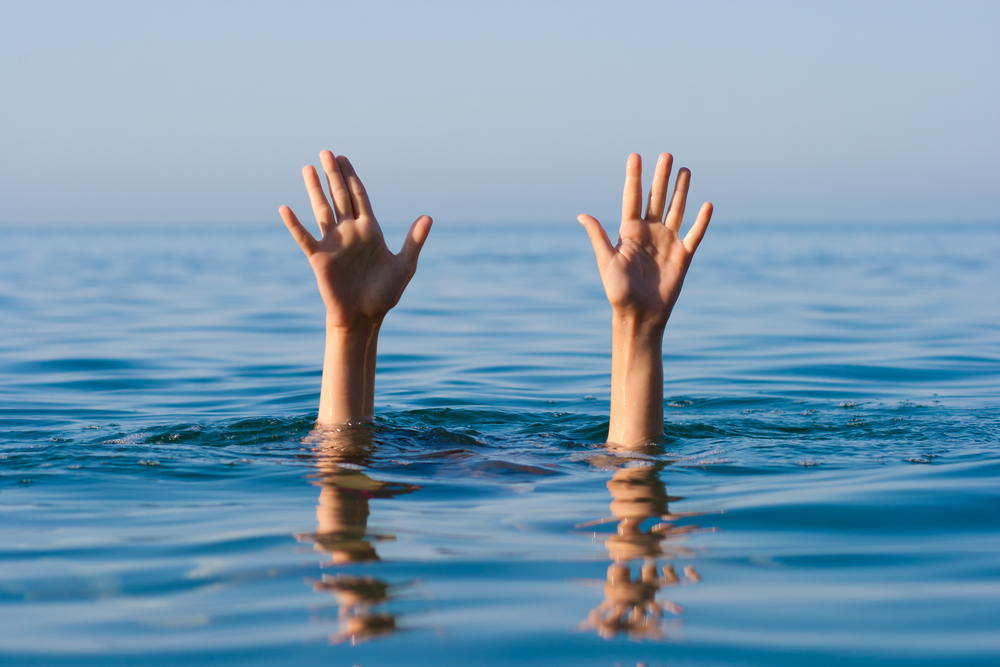

<div>.....and I've realised I'm manipulating the data but I don't know what I'm doing<br>

I've read [Data Pre-Processing with Sklearn (GeeksforGeeks)](https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/) and [Logistic Regression (Realpython.com)](https://realpython.com/logistic-regression-python/?fbclid=IwAR1scT9wiz25VA4fU50_aCwpmdTeuxPIZuqETTXjepLGLEivUwNq_CLWbdA) and now I'm feeling a bit more confident :D

Independent variables (Inputs): all of them.
Dependent varaible (Output): Heart Attach Risk. Binary Classification.

How am I going to analyse the data?<br>
Standard Scaler for: exercise hrs/week, sedentary hrs/day, sleep hrs/day<br>
Max-Min for:  stress level, physical activity days/wk<br>
Then a graph of some kind</div>



In [2]:
#Exercise hrs/week
#I've scaled the data, but can't add it to the dataframe.

MI_Predictors2_df = pd.read_csv('C:\\Users\\User\\My Work\\CODE Lancashire Learning\\Code Lancashire Repository\\Data Analysis Project\\MI_Predictors2_df.csv')
MI_Predictors2_df.head()


,Age,Age Category,Smoking,Obesity,Alcohol Consumption,Diet Int,Heart Attack Risk,Scaled_Exercise_Hours,Scaled_Sedentary_Hrs,Scaled_Sleep_Hrs,Scaled_Stress_Level,Scaled_Physical_ActDays
0,67,"(64.0, 90.0]",1,0,0,2,0,-1.013069,0.172276,-0.515954,0.888889,0.000000
1,84,"(64.0, 90.0]",1,0,1,2,0,-0.034826,0.470759,-1.519791,0.888889,0.428571
2,66,"(64.0, 90.0]",1,1,0,3,0,-0.730290,-1.300014,-1.017872,0.555556,0.142857
3,54,"(44.0, 54.0]",1,0,1,3,1,-1.625459,0.513995,1.491719,0.111111,0.714286
4,90,"(64.0, 90.0]",1,0,1,1,1,-1.025170,-1.556202,1.491719,0.666667,0.571429


In [41]:
data1 = MI_Predictors2_df[['Exercise Hours Per Week']]
scaler = StandardScaler()
model = scaler.fit(data1)
scaled_data1 = model.transform(data1)
print(scaled_data1)

MI_Predictors2_df.head()

[[-1.0130693 ]
 [-0.03482629]
 [-0.73029017]
 ...
 [-1.18931924]
 [-1.07844272]
 [ 1.39169827]]


,Unnamed: 0.1,Unnamed: 0,Age,Age Category,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet Int,Diet,Stress Level,Sedentary Hours Per Day,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,0,0,67,"(64.0, 90.0]",1,0,0,4.168189,2,Average,9,6.615001,0,6,0
1,1,3,84,"(64.0, 90.0]",1,0,1,9.828130,2,Average,9,7.648981,3,4,0
2,2,4,66,"(64.0, 90.0]",1,1,0,5.804299,3,Unhealthy,6,1.514821,1,5,0
3,3,5,54,"(44.0, 54.0]",1,0,1,0.625008,3,Unhealthy,2,7.798752,5,10,1
4,4,6,90,"(64.0, 90.0]",1,0,1,4.098177,1,Healthy,7,0.627356,4,10,1


In [59]:
MI_Predictors2_df['scaled_exercise'] = scaled_data1

del MI_Predictors2_df['scaled_exercise']
MI_Predictors2_df.head()

,Unnamed: 0.1,Unnamed: 0,Age,Age Category,Smoking,Obesity,Alcohol Consumption,Diet Int,Diet,Stress Level,Sedentary Hours Per Day,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Scaled_Exercise_Hours
0,0,0,67,"(64.0, 90.0]",1,0,0,2,Average,9,6.615001,0,6,0,-1.013069
1,1,3,84,"(64.0, 90.0]",1,0,1,2,Average,9,7.648981,3,4,0,-0.034826
2,2,4,66,"(64.0, 90.0]",1,1,0,3,Unhealthy,6,1.514821,1,5,0,-0.730290
3,3,5,54,"(44.0, 54.0]",1,0,1,3,Unhealthy,2,7.798752,5,10,1,-1.625459
4,4,6,90,"(64.0, 90.0]",1,0,1,1,Healthy,7,0.627356,4,10,1,-1.025170


In [63]:
#save the new dataset
MI_Predictors2_df.to_csv('MI_Predictors2_df.csv', index=False)

In [64]:
#Sedentary hrs/day

data2 = MI_Predictors2_df[['Sedentary Hours Per Day']]
scaler = StandardScaler()
model = scaler.fit(data2)
scaled_data2=model.transform(data2)
MI_Predictors2_df.head()



,Unnamed: 0.1,Unnamed: 0,Age,Age Category,Smoking,Obesity,Alcohol Consumption,Diet Int,Diet,Stress Level,Sedentary Hours Per Day,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Scaled_Exercise_Hours
0,0,0,67,"(64.0, 90.0]",1,0,0,2,Average,9,6.615001,0,6,0,-1.013069
1,1,3,84,"(64.0, 90.0]",1,0,1,2,Average,9,7.648981,3,4,0,-0.034826
2,2,4,66,"(64.0, 90.0]",1,1,0,3,Unhealthy,6,1.514821,1,5,0,-0.730290
3,3,5,54,"(44.0, 54.0]",1,0,1,3,Unhealthy,2,7.798752,5,10,1,-1.625459
4,4,6,90,"(64.0, 90.0]",1,0,1,1,Healthy,7,0.627356,4,10,1,-1.025170


In [67]:
MI_Predictors2_df['Scaled_Sedentary_Hrs'] = scaled_data2
del MI_Predictors2_df['Sedentary Hours Per Day']
MI_Predictors2_df.head()

,Unnamed: 0.1,Unnamed: 0,Age,Age Category,Smoking,Obesity,Alcohol Consumption,Diet Int,Diet,Stress Level,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Scaled_Exercise_Hours,Scaled_Sedentary_Hrs
0,0,0,67,"(64.0, 90.0]",1,0,0,2,Average,9,0,6,0,-1.013069,0.172276
1,1,3,84,"(64.0, 90.0]",1,0,1,2,Average,9,3,4,0,-0.034826,0.470759
2,2,4,66,"(64.0, 90.0]",1,1,0,3,Unhealthy,6,1,5,0,-0.730290,-1.300014
3,3,5,54,"(44.0, 54.0]",1,0,1,3,Unhealthy,2,5,10,1,-1.625459,0.513995
4,4,6,90,"(64.0, 90.0]",1,0,1,1,Healthy,7,4,10,1,-1.025170,-1.556202


In [68]:
#Sleep Hours Per Day

data3 = MI_Predictors2_df[['Sleep Hours Per Day']]
scaler = StandardScaler()
model = scaler.fit(data3)
scaled_data3=model.transform(data3)


In [69]:
MI_Predictors2_df['Scaled_Sleep_Hrs'] = scaled_data3
del MI_Predictors2_df['Sleep Hours Per Day']
MI_Predictors2_df.head()

,Unnamed: 0.1,Unnamed: 0,Age,Age Category,Smoking,Obesity,Alcohol Consumption,Diet Int,Diet,Stress Level,Physical Activity Days Per Week,Heart Attack Risk,Scaled_Exercise_Hours,Scaled_Sedentary_Hrs,Scaled_Sleep_Hrs
0,0,0,67,"(64.0, 90.0]",1,0,0,2,Average,9,0,0,-1.013069,0.172276,-0.515954
1,1,3,84,"(64.0, 90.0]",1,0,1,2,Average,9,3,0,-0.034826,0.470759,-1.519791
2,2,4,66,"(64.0, 90.0]",1,1,0,3,Unhealthy,6,1,0,-0.730290,-1.300014,-1.017872
3,3,5,54,"(44.0, 54.0]",1,0,1,3,Unhealthy,2,5,1,-1.625459,0.513995,1.491719
4,4,6,90,"(64.0, 90.0]",1,0,1,1,Healthy,7,4,1,-1.025170,-1.556202,1.491719


In [70]:
#Stress Level
data4 = MI_Predictors2_df[['Stress Level']]
scaler = MinMaxScaler()
model=scaler.fit(data4)
scaled_data4=model.transform(data4)


In [71]:
MI_Predictors2_df['Scaled_Stress_Level'] = scaled_data4
del MI_Predictors2_df['Stress Level']
MI_Predictors2_df.head()

,Unnamed: 0.1,Unnamed: 0,Age,Age Category,Smoking,Obesity,Alcohol Consumption,Diet Int,Diet,Physical Activity Days Per Week,Heart Attack Risk,Scaled_Exercise_Hours,Scaled_Sedentary_Hrs,Scaled_Sleep_Hrs,Scaled_Stress_Level
0,0,0,67,"(64.0, 90.0]",1,0,0,2,Average,0,0,-1.013069,0.172276,-0.515954,0.888889
1,1,3,84,"(64.0, 90.0]",1,0,1,2,Average,3,0,-0.034826,0.470759,-1.519791,0.888889
2,2,4,66,"(64.0, 90.0]",1,1,0,3,Unhealthy,1,0,-0.730290,-1.300014,-1.017872,0.555556
3,3,5,54,"(44.0, 54.0]",1,0,1,3,Unhealthy,5,1,-1.625459,0.513995,1.491719,0.111111
4,4,6,90,"(64.0, 90.0]",1,0,1,1,Healthy,4,1,-1.025170,-1.556202,1.491719,0.666667


In [72]:
#Physical Activity Days Per Week
data5 = MI_Predictors2_df[['Physical Activity Days Per Week']]
scaler = MinMaxScaler()
model=scaler.fit(data5)
scaled_data5=model.transform(data5)

In [77]:
MI_Predictors2_df['Scaled_Physical_ActDays'] = scaled_data5
del MI_Predictors2_df['Unnamed: 0']
MI_Predictors2_df.head()

,Age,Age Category,Smoking,Obesity,Alcohol Consumption,Diet Int,Heart Attack Risk,Scaled_Exercise_Hours,Scaled_Sedentary_Hrs,Scaled_Sleep_Hrs,Scaled_Stress_Level,Scaled_Physical_ActDays
0,67,"(64.0, 90.0]",1,0,0,2,0,-1.013069,0.172276,-0.515954,0.888889,0.000000
1,84,"(64.0, 90.0]",1,0,1,2,0,-0.034826,0.470759,-1.519791,0.888889,0.428571
2,66,"(64.0, 90.0]",1,1,0,3,0,-0.730290,-1.300014,-1.017872,0.555556,0.142857
3,54,"(44.0, 54.0]",1,0,1,3,1,-1.625459,0.513995,1.491719,0.111111,0.714286
4,90,"(64.0, 90.0]",1,0,1,1,1,-1.025170,-1.556202,1.491719,0.666667,0.571429


In [79]:
#save the new dataset
MI_Predictors2_df.to_csv('MI_Predictors2_df.csv', index=False)

Now I need to use <strong>supervised machine learning </strong>to analyse the observations and mathematically express the dependence between the risk factors (the inputs) and the outpus (MI).

Starting with <strong>Single-variate logistic regression</strong> to see if I can do it.
x = scaled sleep hours
y = MI

Then I'll do <strong>multi-variate logistic regression</strong>, if I can.

In [4]:
# Create arrays for the input (x) and output (y)
xnumpy_array = MI_Predictors2_df['Scaled_Sleep_Hrs'].values
x = xnumpy_array.reshape(-1, 1)
print(x)

[[-0.51595401]
 [-1.51979067]
 [-1.01787234]
 ...
 [-1.51979067]
 [ 0.48788265]
 [-1.51979067]]


In [55]:
y = MI_Predictors2_df['Heart Attack Risk'].values
print(y)


[0 0 0 ... 1 0 1]


x now has 2 dimensions (one column and >7000 rows). y is 1D with >7000 items. It contains only 0s and 1s since it is a binary classification.

In [42]:
model = LogisticRegression(solver='liblinear', random_state=0, C=1.0)
model.fit(x, y)
print(model)

LogisticRegression(random_state=0, solver='liblinear')


In [43]:
# .classes_ represents the array of distinct values that y takes:
model.classes_

array([0, 1], dtype=int64)

In [44]:
# .intercept_ and .coef_ gives the value of the slope of b1 and the intercept b0 of the linear function:
model.intercept_


array([-0.57524029])

In [45]:
model.coef_

array([[-0.03266515]])

<h3>Evaluating the model</h3>

In [46]:
# check its performance with .predict_proba(), this returns the matrix of probabilities that the predicted output is equal to 0 or 1.
# the first column is the prob of the output being 0
model.predict_proba(x)

array([[0.63607914, 0.36392086],
       [0.62845539, 0.37154461],
       [0.63227553, 0.36772447],
       ...,
       [0.62845539, 0.37154461],
       [0.64363517, 0.35636483],
       [0.62845539, 0.37154461]])

In [47]:
#get actual predictions
model.predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
model.score(x,y)

0.6400101227382007

In [38]:
confusion_matrix(y, model.predict(x))

array([[5058,    0],
       [2845,    0]], dtype=int64)

<h5>The above aptly named <strong>confusion matrix</strong> shows the following:
<ul><li>5058 true negative predictions in the upper left, and</li>
<li>2845 false negatives in the lower left</li></ul></h5>

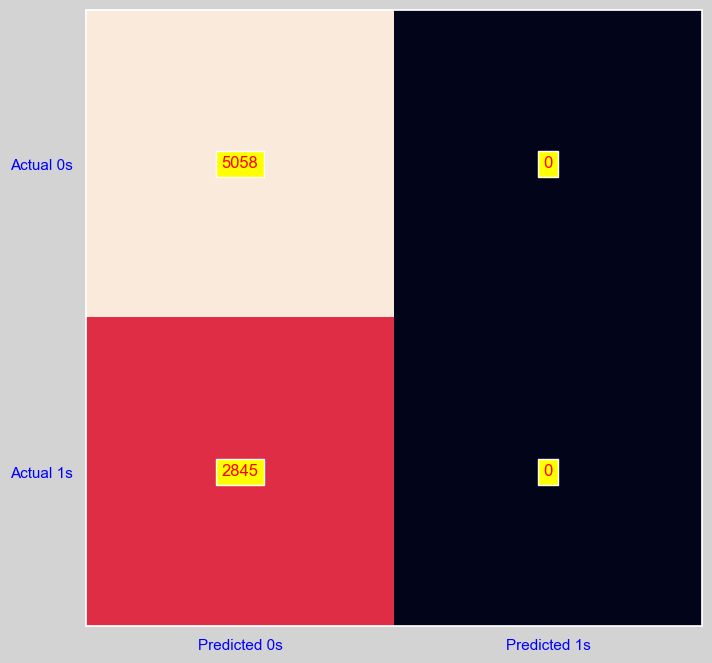

In [28]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_facecolor('lightgray')
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

ax.xaxis.label.set_color('blue')
ax.yaxis.label.set_color('blue')
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='blue')

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', bbox=dict(facecolor='yellow'))
plt.show()

In [29]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      5058
           1       0.00      0.00      0.00      2845

    accuracy                           0.64      7903
   macro avg       0.32      0.50      0.39      7903
weighted avg       0.41      0.64      0.50      7903



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [60]:
shape = MI_Predictors2_df.shape
print("Number of Rows:", shape[0])
print("Number of Columns:", shape[1])

Number of Rows: 7903
Number of Columns: 12


In [78]:
MI_Predictors2_df = pd.read_csv('MI_Predictors2_df.csv')
MI_Predictors2_df.rename(columns={"Heart Attack Risk": "Heart_Attack_Risk"}, inplace=True)
MI_Predictors2_df.to_csv('MI_Predictors2_df.csv', index=False)

In [83]:
data = pd.read_csv('MI_Predictors2_df.csv')

# Defining the formula (the independent variables)
formula = "Heart_Attack_Risk ~ Scaled_Exercise_Hours + Scaled_Sedentary_Hrs + Scaled_Sleep_Hrs + Scaled_Stress_Level + Scaled_Physical_ActDays"

# Fit the logistic regression model
model = sm.Logit.from_formula(formula, data).fit()

# Create a summary of the model
summary = model.summary()

# Display the summary
print(summary)




Optimization terminated successfully.
         Current function value: 0.653165
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_Attack_Risk   No. Observations:                 7903
Model:                          Logit   Df Residuals:                     7897
Method:                           MLE   Df Model:                            5
Date:                Sun, 05 Nov 2023   Pseudo R-squ.:               0.0003787
Time:                        17:23:18   Log-Likelihood:                -5162.0
converged:                       True   LL-Null:                       -5163.9
Covariance Type:            nonrobust   LLR p-value:                    0.5622
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.5411      0.056     -9.655      0.000      -0.651   

In [94]:
print(summary.tables[1])
print(type(summary.tables[1]))

# summary.tables[1]['coef'] = summary.tables[1]['coef'].astype(int)

                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.5411      0.056     -9.655      0.000      -0.651      -0.431
Scaled_Exercise_Hours       0.0256      0.023      1.090      0.276      -0.020       0.072
Scaled_Sedentary_Hrs       -0.0078      0.023     -0.332      0.740      -0.054       0.038
Scaled_Sleep_Hrs           -0.0325      0.023     -1.385      0.166      -0.078       0.013
Scaled_Stress_Level        -0.0109      0.074     -0.147      0.883      -0.156       0.134
Scaled_Physical_ActDays    -0.0588      0.072     -0.817      0.414      -0.200       0.082
<class 'statsmodels.iolib.table.SimpleTable'>


<h4>Summary table saved as a data frame</h4>

In [110]:
summary_table = summary.tables[1].as_html()
summary_df = pd.read_html(summary_table, header=0, index_col=0)[0]
summary_df.to_csv('C:/Users/User/My Work/CODE Lancashire Learning/Code Lancashire Repository/Data Analysis Project/Summary Table_df.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_1688\2230854829.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  summary_df = pd.read_html(summary_table, header=0, index_col=0)[0]


<h4>Now change datatype from string to int</h4>

In [3]:
summary_table_df = pd.read_csv('C:\\Users\\User\\My Work\\CODE Lancashire Learning\\Code Lancashire Repository\\Data Analysis Project\\Summary Table_df.csv')
summary_table_df['coef'] = summary_table_df['coef'].astype(int)
summary_table_df.keys()

Index(['Unnamed: 0', 'coef', 'std err', 'z', 'P>|z|', '[0.025', '0.975]'], dtype='object')

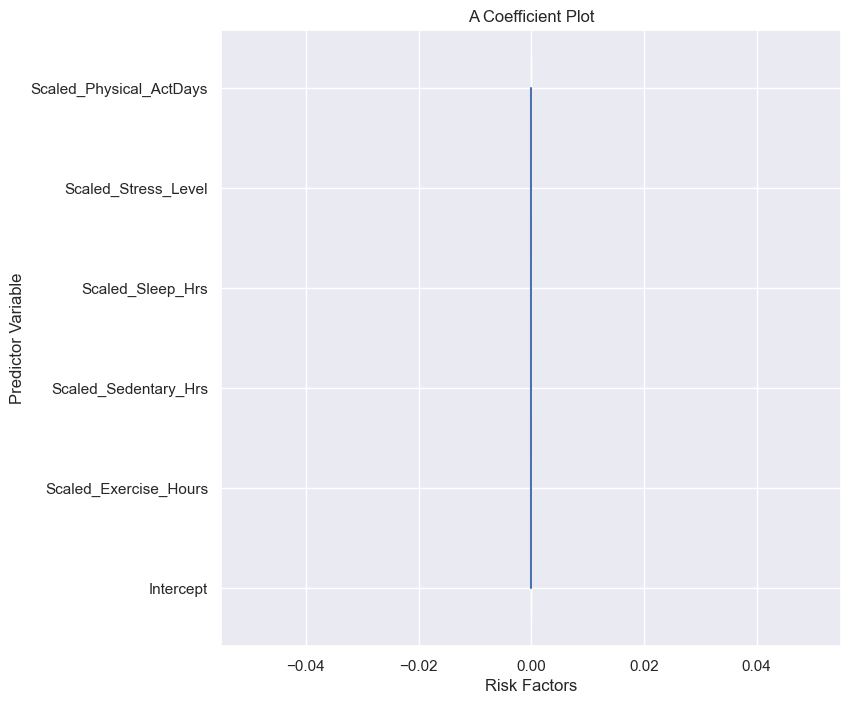

In [13]:
# Create a coefficient plot!!!!!
plt.figure(figsize=(8, 8))

plt.barh(summary_table_df['Unnamed: 0'], summary_table_df['coef'], 0.6,color='red')
plt.plot(summary_table_df['coef'], summary_table_df['Unnamed: 0'])
plt.xlabel('Risk Factors')
plt.ylabel('Predictor Variable')
plt.title('A Coefficient Plot')
plt.grid(True)
plt.show()

<h3>I've spent hours trying to figure out how to get the bars to appear on this bar chart</h3>

In [21]:
summary_table_df.head()

,Unnamed: 0,coef,std err,z,P>|z|,[0.025,0.975]
0,Intercept,0,0.056,-9.655,0.000,-0.651,-0.431
1,Scaled_Exercise_Hours,0,0.023,1.090,0.276,-0.020,0.072
2,Scaled_Sedentary_Hrs,0,0.023,-0.332,0.740,-0.054,0.038
3,Scaled_Sleep_Hrs,0,0.023,-1.385,0.166,-0.078,0.013
4,Scaled_Stress_Level,0,0.074,-0.147,0.883,-0.156,0.134


![](Images/baby-1.avif)